# Compulsory Assignment 1 - Pandas and visualizations

### Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


---
## Loading and exploring the dataset

__1. Load the dataset named `airbnb.csv` and store it in a dataframe called `raw_df`. Use the column named `ìd` as the index column for the dataframe__

In [16]:
# Insert your code below
# ======================
raw_df = pd.read_csv('airbnb.csv', sep=',').set_index('id')

__2. Print the first `five` rows of the dataframe__

In [13]:
# Insert your code below
# ======================
print(raw_df.head(5))

                                                     name  host_id  host_name  \
id                                                                              
183319                  Panoramic Ocean View Venice Beach   867995  Barbara X   
109     Amazing bright elegant condo park front *UPGRA...      521      Paolo   
51307   Spanish Bungalow Guest House LA CA. 30 plus ni...   235568      David   
184314                    Boho Chic Flat..Steps to Beach!   884031     Ashley   
51498   Guest House With Its Own Entrance/Exit and Hot...   236758        Bay   

          neighbourhood  latitude  longitude        room_type  price  \
id                                                                     
183319           Venice  33.99211 -118.47600  Entire home/apt    152   
109         Culver City  33.98301 -118.38607  Entire home/apt    115   
51307   Atwater Village  34.12206 -118.26783  Entire home/apt     75   
184314           Venice  33.97487 -118.46312  Entire home/apt    125   


__3. How many unique values exist in each of the columns `state` and `city`?__

In [14]:
# Insert your code below
# ======================
state = raw_df.state
city = raw_df.city

print(f'\nNumber of unique states: {state.nunique()}')
print(f'\nNumber of unique cities: {city.nunique()}')


Number of unique states: 19

Number of unique cities: 31


__4. Identify missing (NaN) values in each of the columns in the dataset__

In [15]:
# Insert your code below
# ======================
#print(raw_df.isnull().any())

#num_name = raw_df['name'].isnull().sum()
#num_host_name = raw_df['host_name'].isnull().sum()
#num_neighbourhood = raw_df['neighbourhood'].isnull().sum()

#print(f'\nNumber of NaN values in name col: {num_name}')
#print(f'\nNumber of NaN values in host_name col: {num_host_name}')
#print(f'\nNumber of NaN values in neighbourhood col: {num_neighbourhood}')

print(raw_df.isna().sum())

#raw_df[raw_df['name'].isnull()]

name                                19
host_id                              0
host_name                         1144
neighbourhood                      712
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
state                                0
city                                 0
dtype: int64


__5. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values?__

In [17]:
# Insert your code below
# ======================
df = raw_df.copy()
df = df.dropna()

print(f'\nNumber of rows in raw_df: {raw_df.shape[0]}, number of columns in raw_df: {raw_df.shape[1]}')

print(f'\nNumber of rows in df: {df.shape[0]}, number of columns in df: {df.shape[1]}')

#display(df)


Number of rows in raw_df: 325858, number of columns in raw_df: 15

Number of rows in df: 323983, number of columns in df: 15


__6. Which `room_type`, `state` and `city` is the most popular (by number of instances)? Print the name and count of each__

Hint: The output should look something like this:
```python
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
```

In [82]:
# Insert your code below
# ======================

list_df = ['room_type', 'state', 'city']

for _ in list_df:
    count = df[_].value_counts()
    pop = df[_].value_counts().idxmax()
    print(f'\nColumn: {_}, Most popular: {pop}, Count: {count[0]}')
    



Column: room_type, Most popular: Entire home/apt, Count: 241433

Column: state, Most popular: CA, Count: 127206

Column: city, Most popular: Los Angeles, Count: 91600


__7. What is the average and median `price` for a listing?__

In [27]:
# Insert your code below
# ======================
mean_p = raw_df['price'].mean()
median_p = raw_df['price'].median()

print(f'\nAverage of price: {raw_df.price.mean()}, \nMedian of price: {raw_df.price.median()}')


Average of price: 284.9153035985, 
Median of price: 159.0


__8. What is the average price for the states `CA`, `FL` and `NY`?__

Hint: The output should look something like this:
```python
State: [col], Average price: [price]
State: [col], Average price: [price]
State: [col], Average price: [price]
```

In [81]:
# Insert your code below
# ======================

states_list = [ 'CA', 'FL', 'NY']

for _ in states_list:
    h = df[df.state == _]
    average = h.price.describe()['mean']
    
    print(f'\nState: {_}, \nAverage price: {average}')
    



State: CA, 
Average price: 288.39531940317283

State: FL, 
Average price: 241.98664420647336

State: NY, 
Average price: 197.21922246220302


__9. Create a new dataframe called `df_beach` containing all listings with "beach" in the `name`. Print out the shape of `beach_df`__

The filtering should not be case sensitive, meaning that names containing `beach`, `Beach`, `BeAcH` etc. all should be included


In [87]:
# Insert your code below
# ======================
df_beach = df[df['name'].str.contains('beach',case=False)]
#print(df_beach)
print(f'\nNumber of rows in df_beach: {df_beach.shape[0]}, number of columns in df_beach: {df_beach.shape[1]}')


Number of rows in df_beach: 31436, number of columns in df_beach: 15


---

## Visualizing the dataset

__10. Create plot with 2 vertical axes and one horizontal axes. The plot should display a barchart containing the `count` of the `10 most popular` states and cities, each in its own subplot. The bars should be sorted in descending order.__

Use `df` in all tasks in this section

Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/ex10.png"
     alt="Barchart example"/>

PS: Disregard the color scheme of the example image.

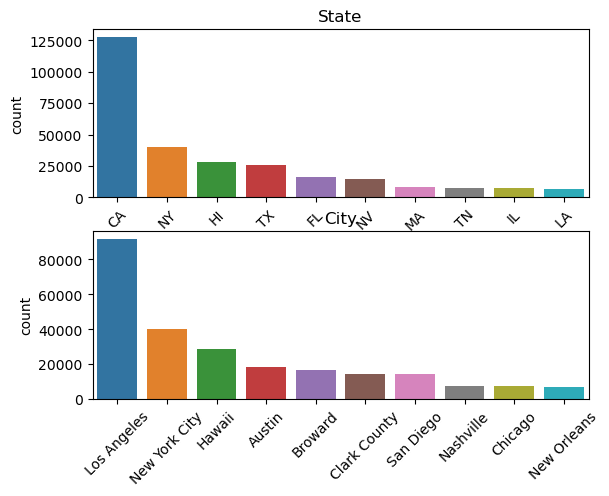

In [26]:
# Insert your code below
# ======================
df_state = df['state'].value_counts()[:10].sort_values(ascending=False).to_frame()
colnames = ['count']
df_state.columns = colnames



df_city = df['city'].value_counts()[:10].sort_values(ascending=False).to_frame()
colnames = ['count']
df_city.columns = colnames

plt.subplot(2, 1, 1)
sns.barplot(data=df_state, x=df_state.index, y='count')
plt.xticks(rotation = 45)
plt.title("State")

plt.subplot(2, 1, 2)
sns.barplot(data=df_city, x=df_city.index, y="count")
plt.xticks(rotation = 45)
plt.title("City")

plt.show()

__11. Create a scatterplot with the longitude and latitude of the listings in `df`. Longitude should be on the x-axis and latitude on the y-axis.__ 

The output should look something like this:

<img src="assets/ex11.png"
     alt="Scatterplot example"/>

PS: Disregard the color scheme of the example image.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

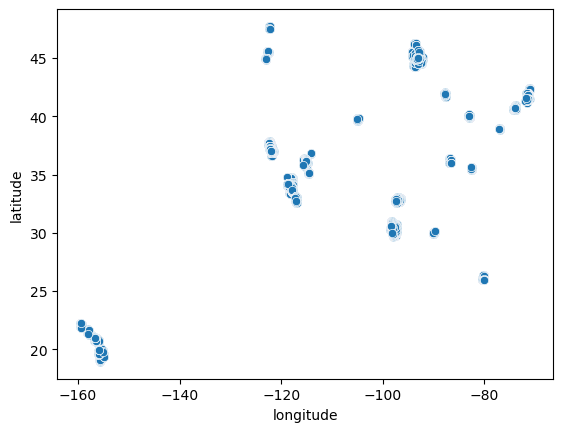

In [164]:
# Insert your code below
# ======================
sns.scatterplot(data = df, x='longitude', y='latitude')

__12. Create a matrix containing the correlations between the different columns in `df`. Plot it as a heatmap using Seaborn or similar. What does the plot tell you about correlations? Which columns are the most correlated to `price`?__

host_id                           0.014730
latitude                         -0.072637
longitude                        -0.069591
price                             1.000000
minimum_nights                   -0.024497
number_of_reviews                -0.054495
calculated_host_listings_count    0.077413
availability_365                  0.016585
number_of_reviews_ltm            -0.048674
Name: price, dtype: float64


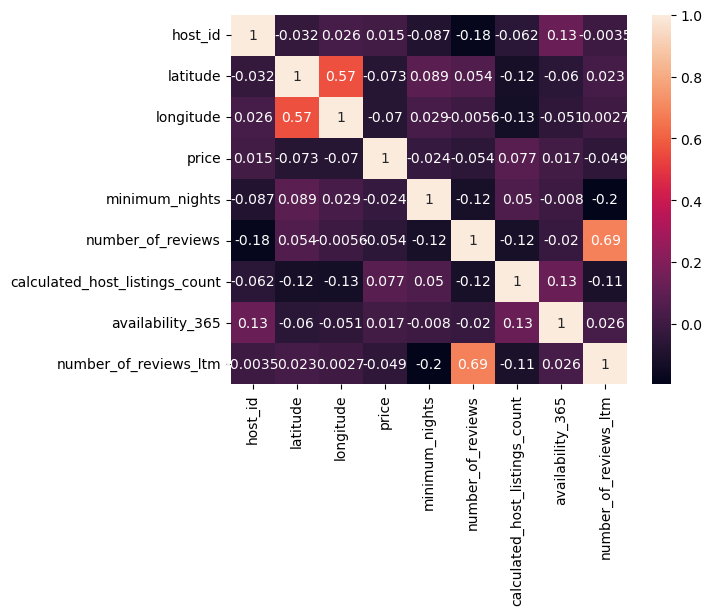

In [172]:
# Insert your code below
# ======================
corr = df.corr()
sns.heatmap(corr,annot=True);

print(corr.price)


calculated_host_listings_count are most correlated to price. You can also see in the heatmap that longitude and latitude have a correlation (0.57). Also number_of_reviews and number_of_reviews_ltm has a high correlation (0.69). 